In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Question 2 - Biggest strides in decreasing CO2***

In [ ]:
# import data
df_co2 = pd.read_csv("https://raw.githubusercontent.com/Opeth1973/Project_Assignement_CO2/refs/heads/main/co-emissions-per-capita.csv")
df_pop = pd.read_csv("https://raw.githubusercontent.com/Opeth1973/Project_Assignement_CO2/refs/heads/main/population-and-demography.csv")
df_co2.head()
#df_pop.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685


In [ ]:
# Rename columns
df_pop.rename(columns={'Population - Sex: all - Age: all - Variant: estimates': "Population"}, inplace=True)
df_co2.rename(columns={'Annual CO₂ emissions (per capita)': "CO2 Emission"}, inplace=True)

# Merge gpd & fossil fuel dataframe
df_merged2 = pd.merge(df_pop, df_co2 ,how='outer', on=['Entity', 'Year'])


df_final2 = df_merged2.copy()
df_final2.drop(['Code_y'], axis=1, inplace=True)
df_final2.dropna(inplace=True)
df_final2.rename(columns={'Code_x': "Code"}, inplace=True)
df_final2.head(200)

,Entity,Code,Year,Population,CO2 Emission
1,Afghanistan,AFG,1950,7776182.0,0.011266
2,Afghanistan,AFG,1951,7879343.0,0.012098
3,Afghanistan,AFG,1952,7987783.0,0.011946
4,Afghanistan,AFG,1953,8096703.0,0.013685
5,Afghanistan,AFG,1954,8207953.0,0.013511
...,...,...,...,...,...
551,Algeria,DZA,1999,30474359.0,3.013539
552,Algeria,DZA,2000,30903895.0,2.774968
553,Algeria,DZA,2001,31331226.0,2.783221
554,Algeria,DZA,2002,31750833.0,2.867771


In [ ]:


df_final2['diff population'] = df_final2.groupby('Entity')['Population'].diff()
df_final2['diff emission'] = df_final2.groupby('Entity')['CO2 Emission'].diff()
# df_final2.head(200)

#Calculate percentage change in CO2 emission and population
df_final2['% Change Emission'] = round(((df_final2['diff emission'] / df_final2['CO2 Emission'])*100),2)
df_final2['% Change Population'] = round(((df_final2['diff population'] / df_final2['Population'])*100),2)

# Create copy of the dataset
df_final2022 = df_final2.copy()

#Only leave the data from 2022
year = [2022]
df_final22 = df_final2022[(df_final2022['Year'].isin(year))]

df_final22.head(200)


,Entity,Code,Year,Population,CO2 Emission,diff population,diff emission,% Change Emission,% Change Population
73,Afghanistan,AFG,2022,40578846.0,0.295364,578435.0,-0.010953,-3.71,1.43
466,Albania,ALB,2022,2827615.0,1.743200,-22028.0,0.025460,1.46,-0.78
574,Algeria,DZA,2022,45477391.0,3.927226,716290.0,-0.152301,-3.88,1.58
951,Andorra,AND,2022,79722.0,4.617124,1347.0,0.024918,0.54,1.69
1025,Angola,AGO,2022,35635028.0,0.451552,1102601.0,-0.055805,-12.36,3.09
...,...,...,...,...,...,...,...,...,...
27311,Tunisia,TUN,2022,12119336.0,2.879285,70711.0,0.005239,0.18,0.58
27470,Turkey,TUR,2022,87058470.0,5.105206,372215.0,-0.234819,-4.60,0.43
27642,Turkmenistan,TKM,2022,7230198.0,11.034180,138157.0,0.000374,0.00,1.91
27716,Turks and Caicos Islands,TCA,2022,45869.0,7.636793,609.0,-0.028323,-0.37,1.33


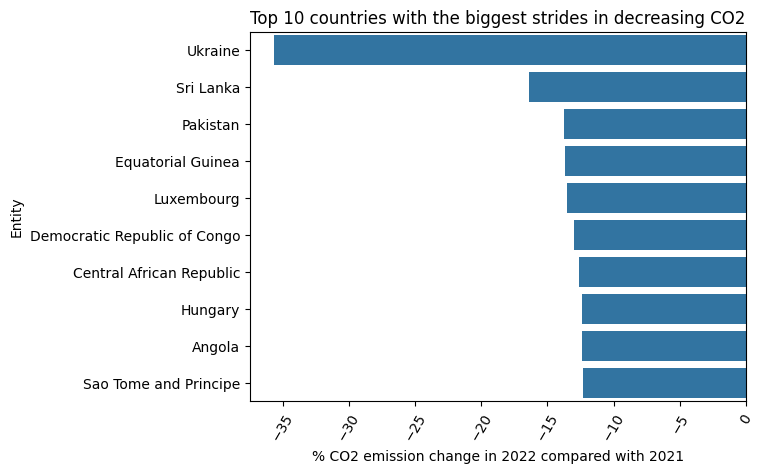

In [ ]:
# df = sns.load_dataset('df_final22')
top10 = df_final22.sort_values(by='% Change Emission', ascending=True).head(10)
ax = sns.barplot(x = '% Change Emission',y = 'Entity',data = top10)
plt.xticks(rotation=60)
# ax.bar_label(ax.containers[0])
plt.title('Top 10 countries with the biggest strides in decreasing CO2')
plt.xlabel('% CO2 emission change in 2022 compared with 2021')
plt.ylabel('Entity')
plt.show()

In [ ]:
#Only show the countries that have an increase in population
pos_pop_in = df_final22[df_final22['% Change Population'] >= 0].dropna()
pos_pop_in

,Entity,Code,Year,Population,CO2 Emission,diff population,diff emission,% Change Emission,% Change Population
73,Afghanistan,AFG,2022,4.057885e+07,0.295364,578435.0,-0.010953,-3.71,1.43
574,Algeria,DZA,2022,4.547739e+07,3.927226,716290.0,-0.152301,-3.88,1.58
951,Andorra,AND,2022,7.972200e+04,4.617124,1347.0,0.024918,0.54,1.69
1025,Angola,AGO,2022,3.563503e+07,0.451552,1102601.0,-0.055805,-12.36,3.09
1173,Antigua and Barbuda,ATG,2022,9.285100e+04,6.421875,493.0,0.021581,0.34,0.53
...,...,...,...,...,...,...,...,...,...
29673,Vietnam,VNM,2022,9.968066e+07,3.499517,745555.0,-0.117597,-3.36,0.75
30050,World,OWID_WRL,2022,8.021407e+09,4.658219,66958765.0,0.003374,0.07,0.83
30124,Yemen,YEM,2022,3.822288e+07,0.337017,1082647.0,-0.014327,-4.25,2.83
30198,Zambia,ZMB,2022,2.015293e+07,0.445701,549324.0,0.000823,0.18,2.73


Text(0.5, 1.0, 'Top 10 countries with the biggest strides in decreasing CO2 Emissions\n and with a Population increase in 2022 compared to 2021')

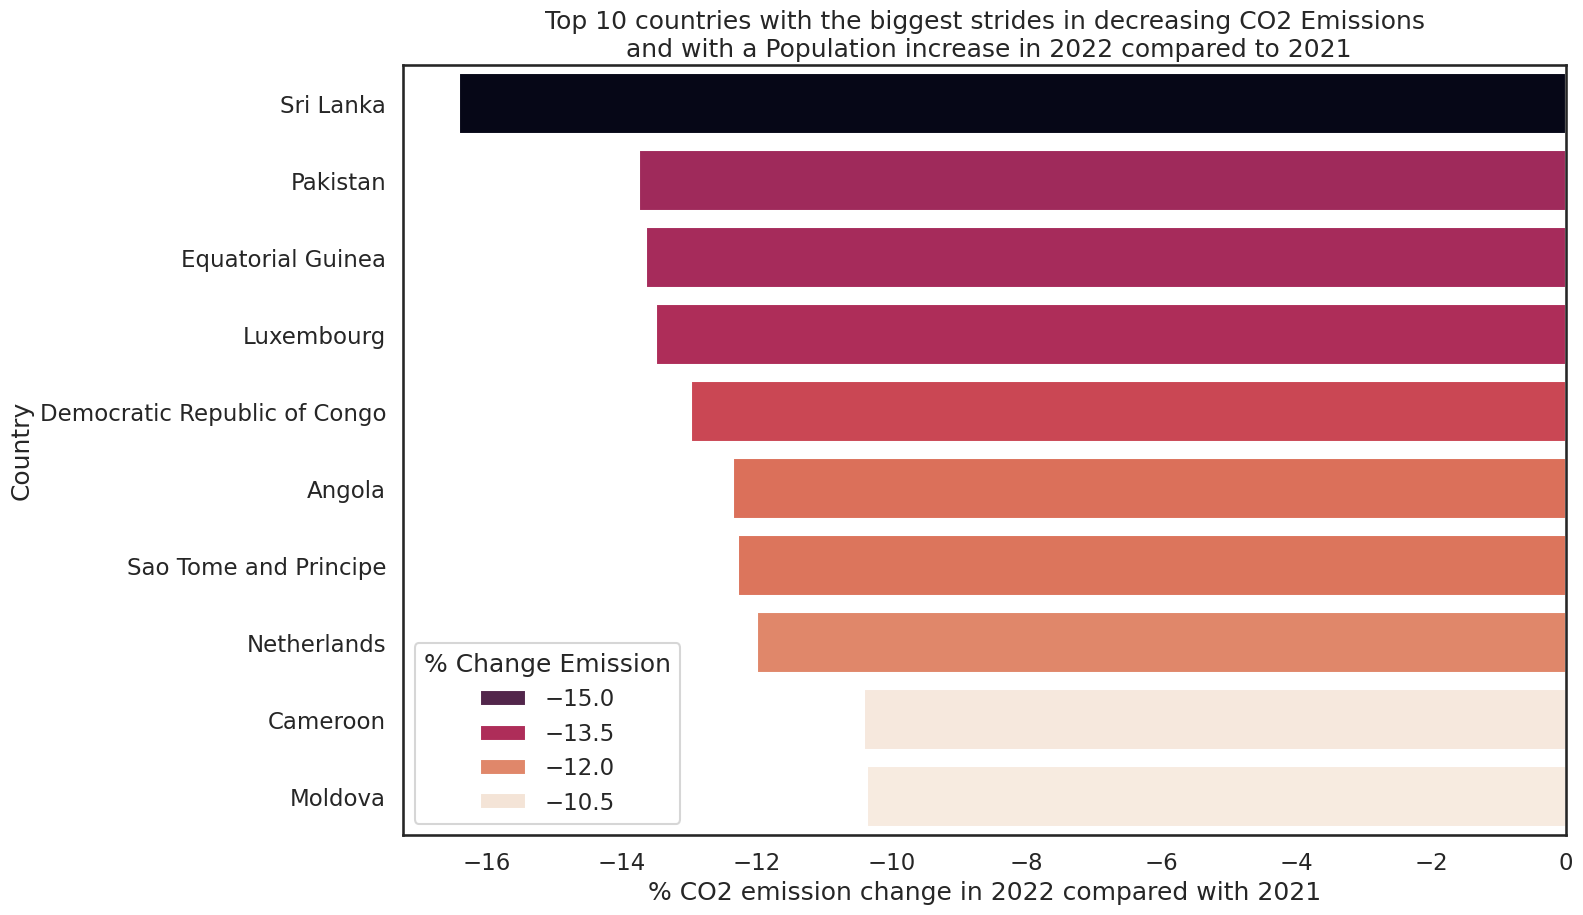

In [ ]:

top10Emission = pos_pop_in.sort_values(by='% Change Emission', ascending=True).head(10)
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, (ax) = plt.subplots(figsize=(15, 10), sharex=True)


x = top10Emission['% Change Emission']
y = top10Emission['Entity']
sns.barplot(x=x, y=y, hue=x, palette="rocket", ax=ax)
# ax1.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Country")
ax.set_xlabel("% CO2 emission change in 2022 compared with 2021")
ax.set_title("Top 10 countries with the biggest strides in decreasing CO2 Emissions\n and with a Population increase in 2022 compared to 2021")
# plt.show()

